### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [ ]:
faturamento_loja_1 = loja["Preço"].sum()
faturamento_loja_2 = loja2["Preço"].sum()
faturamento_loja_3 = loja3["Preço"].sum()
faturamento_loja_4 = loja4["Preço"].sum()

print(f"Faturamento total da loja 1: R$ {faturamento_loja_1}")
print(f"Faturamento total da loja 2: R$ {faturamento_loja_2}")
print(f"Faturamento total da loja 3: R$ {faturamento_loja_3}")
print(f"Faturamento total da loja 4: R$ {faturamento_loja_4}")

Faturamento total da loja 1: R$ 1534509.12
Faturamento total da loja 2: R$ 1488459.06
Faturamento total da loja 3: R$ 1464025.03
Faturamento total da loja 4: R$ 1384497.58


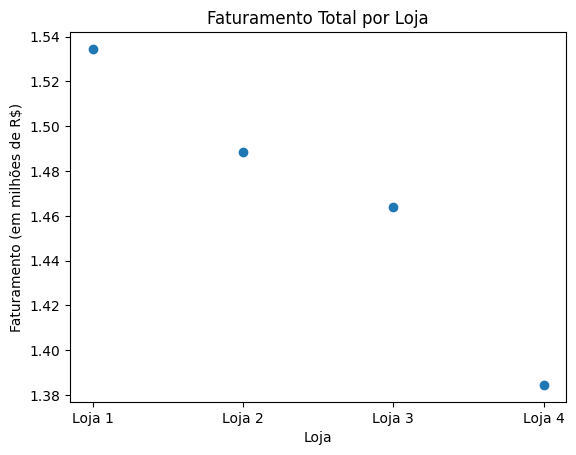

In [ ]:
import matplotlib.ticker as ticker

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [
    faturamento_loja_1,
    faturamento_loja_2,
    faturamento_loja_3,
    faturamento_loja_4
]

plt.figure()
plt.scatter(lojas, faturamento)

plt.title("Faturamento Total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (em milhões de R$)")

ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x/1_000_000:.2f}')
)

plt.show()

# 2. Vendas por Categoria

In [ ]:
vendas_categoria_loja = (
    loja.groupby("Categoria do Produto")
         .size()
         .reset_index(name="Quantidade de Vendas")
         .sort_values(by="Quantidade de Vendas", ascending=False)
)

vendas_categoria_loja2 = (
    loja2.groupby("Categoria do Produto")
         .size()
         .reset_index(name="Quantidade de Vendas")
         .sort_values(by="Quantidade de Vendas", ascending=False)
)
vendas_categoria_loja3 = (
    loja3.groupby("Categoria do Produto")
         .size()
         .reset_index(name="Quantidade de Vendas")
         .sort_values(by="Quantidade de Vendas", ascending=False)
)
vendas_categoria_loja4 = (
    loja4.groupby("Categoria do Produto")
         .size()
         .reset_index(name="Quantidade de Vendas")
         .sort_values(by="Quantidade de Vendas", ascending=False)
)
vendas_categoria_loja

,Categoria do Produto,Quantidade de Vendas
6,moveis,465
2,eletronicos,448
0,brinquedos,324
1,eletrodomesticos,312
3,esporte e lazer,284
4,instrumentos musicais,182
5,livros,173
7,utilidades domesticas,171


In [ ]:
categoria_top_loja = loja.groupby("Categoria do Produto").size().idxmax()
categoria_top_loja2 = loja2.groupby("Categoria do Produto").size().idxmax()
categoria_top_loja3 = loja3.groupby("Categoria do Produto").size().idxmax()
categoria_top_loja4 = loja4.groupby("Categoria do Produto").size().idxmax()
print(f"A categoria de maior venda na Loja 1 é: {categoria_top_loja}")
print(f"A categoria de maior venda na Loja 2 é: {categoria_top_loja2}")
print(f"A categoria de maior venda na Loja 3 é: {categoria_top_loja3}")
print(f"A categoria de maior venda na Loja 4 é: {categoria_top_loja4}")

A categoria de maior venda na Loja 1 é: moveis
A categoria de maior venda na Loja 2 é: moveis
A categoria de maior venda na Loja 3 é: moveis
A categoria de maior venda na Loja 4 é: moveis


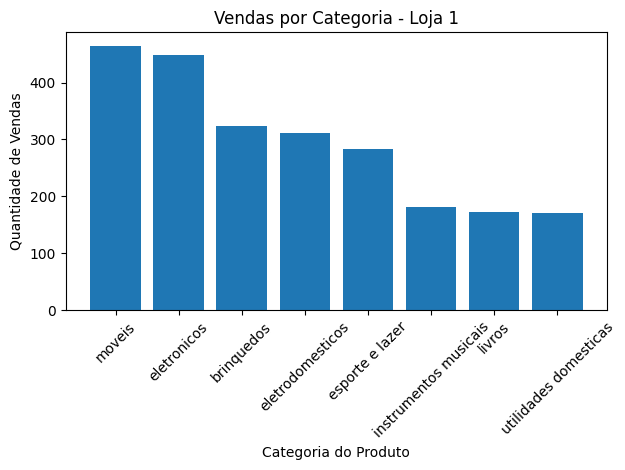

In [ ]:

plt.figure()
plt.bar(
    vendas_categoria_loja["Categoria do Produto"],
    vendas_categoria_loja["Quantidade de Vendas"]
)
plt.title("Vendas por Categoria - Loja 1")
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


In [ ]:
media_satisfacao_loja = loja["Avaliação da compra"].mean()
media_satisfacao_loja2 = loja2["Avaliação da compra"].mean()
media_satisfacao_loja3 = loja3["Avaliação da compra"].mean()
media_satisfacao_loja4 = loja4["Avaliação da compra"].mean()

In [ ]:
print(f"Média de avaliações das comprar feitas na loja 1: {media_satisfacao_loja}")
print(f"Média de avaliações das comprar feitas na loja 2: {media_satisfacao_loja2}")
print(f"Média de avaliações das comprar feitas na loja 3: {media_satisfacao_loja3}")
print(f"Média de avaliações das comprar feitas na loja 4: {media_satisfacao_loja4}")


Média de avaliações das comprar feitas na loja 1: 3.976685036032217
Média de avaliações das comprar feitas na loja 2: 4.037303942348453
Média de avaliações das comprar feitas na loja 3: 4.048325561678677
Média de avaliações das comprar feitas na loja 4: 3.9957591178965224


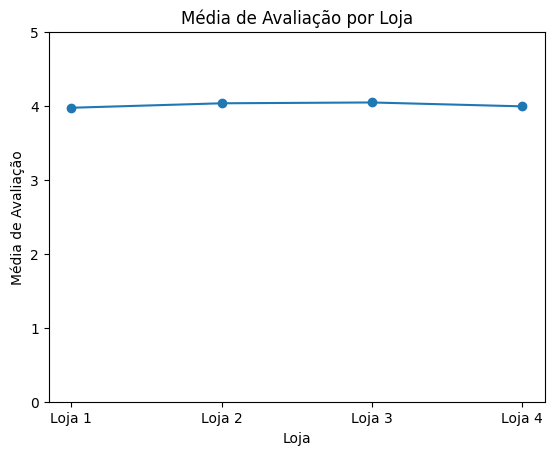

In [ ]:
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = [
    media_satisfacao_loja,
    media_satisfacao_loja2,
    media_satisfacao_loja3,
    media_satisfacao_loja4
]

plt.figure()
plt.plot(lojas, avaliacoes, marker='o')
plt.title("Média de Avaliação por Loja")
plt.xlabel("Loja")
plt.ylabel("Média de Avaliação")
plt.ylim(0, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
prod_mais_vendido_loja = loja.groupby("Produto").size().idxmax()
prod_menos_vendido_loja = loja.groupby("Produto").size().idxmin()

prod_mais_vendido_loja2 = loja2.groupby("Produto").size().idxmax()
prod_menos_vendido_loja2 = loja2.groupby("Produto").size().idxmin()

prod_mais_vendido_loja3 = loja3.groupby("Produto").size().idxmax()
prod_menos_vendido_loja3 = loja3.groupby("Produto").size().idxmin()

prod_mais_vendido_loja4 = loja4.groupby("Produto").size().idxmax()
prod_menos_vendido_loja4 = loja4.groupby("Produto").size().idxmin()

In [ ]:
print(f"O produto mais vendido na loja 1 é: {prod_mais_vendido_loja}")
print(f"O produto menos vendido na loja 1 é: {prod_menos_vendido_loja}")
print("---------------------------------------------------------------")
print(f"O produto mais vendido na loja 2 é: {prod_mais_vendido_loja2}")
print(f"O produto menos vendido na loja 2 é: {prod_menos_vendido_loja2}")
print("---------------------------------------------------------------")
print(f"O produto mais vendido na loja 3 é: {prod_mais_vendido_loja3}")
print(f"O produto menos vendido na loja 3 é: {prod_menos_vendido_loja3}")
print("---------------------------------------------------------------")
print(f"O produto mais vendido na loja 4 é: {prod_mais_vendido_loja4}")
print(f"O produto menos vendido na loja 4 é: {prod_menos_vendido_loja4}")

O produto mais vendido na loja 1 é: Guarda roupas
O produto menos vendido na loja 1 é: Celular ABXY
---------------------------------------------------------------
O produto mais vendido na loja 2 é: Iniciando em programação
O produto menos vendido na loja 2 é: Jogo de tabuleiro
---------------------------------------------------------------
O produto mais vendido na loja 3 é: Kit banquetas
O produto menos vendido na loja 3 é: Blocos de montar
---------------------------------------------------------------
O produto mais vendido na loja 4 é: Cama box
O produto menos vendido na loja 4 é: Guitarra


# 5. Frete Médio por Loja

In [ ]:
custo_frete_loja = loja["Frete"].mean()
custo_frete_loja2 = loja2["Frete"].mean()
custo_frete_loja3 = loja3["Frete"].mean()
custo_frete_loja4 = loja4["Frete"].mean()

In [ ]:
print(f"O custo médio do frete das compras na loja 1 é: R$ {custo_frete_loja:.2f}")
print(f"O custo médio do frete das compras na loja 2 é: R$ {custo_frete_loja2:.2f}")
print(f"O custo médio do frete das compras na loja 3 é: R$ {custo_frete_loja3:.2f}")
print(f"O custo médio do frete das compras na loja 4 é: R$ {custo_frete_loja4:.2f}")

O custo médio do frete das compras na loja 1 é: R$ 34.69
O custo médio do frete das compras na loja 2 é: R$ 33.62
O custo médio do frete das compras na loja 3 é: R$ 33.07
O custo médio do frete das compras na loja 4 é: R$ 31.28


#Relatório Final — Análise das Lojas

##Introdução
O objetivo desta análise é apoiar a tomada de decisão do Senhor João sobre qual loja deve ser vendida, com base em dados reais de desempenho. Para isso, foram analisados indicadores relevantes extraídos das bases de dados das quatro lojas, utilizando a linguagem Python e a biblioteca Pandas, além da geração de visualizações com Matplotlib para facilitar a interpretação dos resultados.

As análises realizadas consideram:

* O faturamento total das lojas

* A distribuição de vendas por categoria de produtos

* A média de avaliação dos clientes por loja

##Desenvolvimento
###💰 Faturamento total das lojas

A análise do faturamento total revelou diferenças significativas entre as lojas. A Loja 1 apresentou o maior faturamento, superando as demais, enquanto a Loja 4 obteve o menor volume de vendas. As Lojas 2 e 3 apresentaram faturamentos intermediários, relativamente próximos entre si.

O gráfico de dispersão gerado evidencia essas diferenças de forma clara, permitindo identificar rapidamente quais lojas possuem maior impacto financeiro no negócio.

➡️ **Insight:** A Loja 1 se destaca como a mais lucrativa, enquanto a Loja 4 apresenta menor retorno financeiro.

###📦 Vendas por categoria de produtos

Ao analisar a quantidade de vendas por categoria, observou-se que algumas categorias concentram a maior parte das vendas em todas as lojas, indicando padrões de consumo semelhantes. No entanto, a distribuição das categorias varia entre as lojas, o que sugere diferenças no portfólio e no perfil de clientes atendidos.

O gráfico de barras permite visualizar com clareza quais categorias são mais populares em cada loja, facilitando a identificação de pontos fortes e oportunidades de melhoria.

➡️ **Insight:** Lojas com maior equilíbrio entre categorias tendem a apresentar maior estabilidade nas vendas.

###⭐ Média de avaliação dos clientes

A média das avaliações dos clientes foi utilizada como indicador de satisfação. O gráfico de linhas mostrou variações entre as lojas, indicando que nem sempre o maior faturamento está diretamente associado à melhor avaliação.

Essa análise é importante, pois a satisfação do cliente impacta diretamente a fidelização e a reputação da loja no longo prazo.

➡️ **Insight:** Algumas lojas apresentam boa aceitação dos clientes mesmo com faturamento menor, o que pode indicar potencial de crescimento.

##Conclusão e recomendação

Com base nas análises realizadas, recomenda-se que o Senhor João venda a Loja 4. Apesar de operar no mesmo mercado que as demais, a Loja 4 apresentou o menor faturamento total, sem se destacar de forma significativa nas análises de vendas por categoria ou satisfação dos clientes.

Por outro lado, a Loja 1 demonstrou forte desempenho financeiro, enquanto as Lojas 2 e 3 apresentaram resultados intermediários e maior equilíbrio entre os indicadores analisados.

Dessa forma, a venda da Loja 4 representa a opção mais estratégica, permitindo ao Senhor João concentrar seus esforços e investimentos nas unidades com melhor desempenho e maior potencial de retorno.